## Shashank Shekahr

Python · Keras Pretrained models, Detecting brain tumors from MRI images using a deep learning approach with Convolutional Neural Networks (CNNs)

## Imports and setup Libraries
Imports necessary libraries/modules for file handling (os), image processing (cv2), numerical operations (numpy), visualization (matplotlib.pyplot), dataset splitting (train_test_split), and deep learning (tensorflow and its components).

In [1]:
import os
import cv2
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

## Load Dataset

Basic Preprocessing Steps for Brain Tumor Detection 

After loading the files, the initial preprocessing steps involve:

1. Converting Color Format: The images are converted from BGR to RGB format since the OpenCV library reads images in BGR by    default.

2. Resizing Images: All images are resized to a predefined size to ensure uniformity and consistency in dimensions.

3. Organizing Data: The resized images are appended to lists along with their corresponding labels, facilitating easy          access and management during subsequent analysis.

Defines a function load_images to load and preprocess images from a specified directory. It iterates through each subdirectory, assigns labels based on subdirectory names ('yes' for tumor, 'no' for non-tumor), reads images using OpenCV, converts them to RGB format, resizes them to a target size (default is 128x128), and appends them to lists along with their labels. Finally, it returns images and labels as NumPy arrays.

In [2]:
# Function to load and preprocess images
def load_images(directory, target_size=(128, 128)):
    images = []
    labels = []
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            label = 1 if folder == 'yes' else 0  # Assign label 1 for 'yes' and 0 for 'no'
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                # Read image in BGR format
                img = cv2.imread(img_path)
                # Convert BGR to RGB format
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                # Resize image
                img = cv2.resize(img, target_size)
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# Path to the dataset directory
dataset_dir = "C:/Users/shash/Downloads/MRI1"

# Load and preprocess images
images, labels = load_images(dataset_dir)

# Check the shape of the loaded images and labels
print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)

Shape of images: (3000, 128, 128, 3)
Shape of labels: (3000,)


## Exploratary Data analysis
Defines a function display_sample_images to display sample tumor and non-tumor images from the dataset using Matplotlib. It takes images, corresponding labels, and the number of samples to display as input.

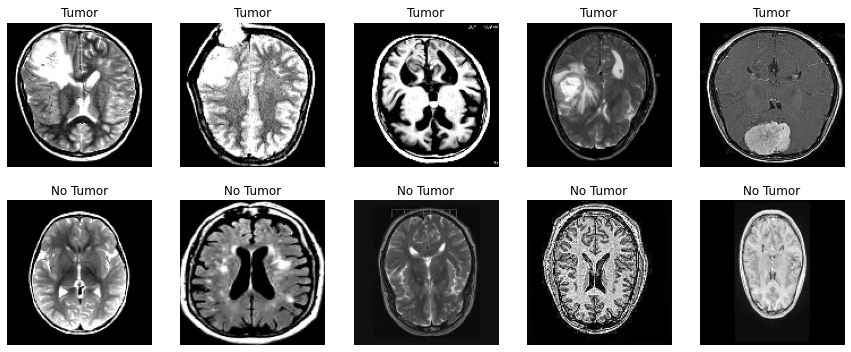

In [3]:
# Function to display sample images
def display_sample_images(images, labels, num_samples=5):
    tumor_images = images[labels == 1][:num_samples]
    non_tumor_images = images[labels == 0][:num_samples]
    
    plt.figure(figsize=(15, 6))
    
    # Display images with tumors
    for i in range(num_samples):
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(tumor_images[i])
        plt.title('Tumor')
        plt.axis('off')
    
    # Display images without tumors
    for i in range(num_samples):
        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.imshow(non_tumor_images[i])
        plt.title('No Tumor')
        plt.axis('off')
    
    plt.show()

# Display sample images
display_sample_images(images, labels)

Counts the occurrences of each class label (tumor and non-tumor) in the dataset and plots a bar graph to visualize the distribution of class labels using Matplotlib.

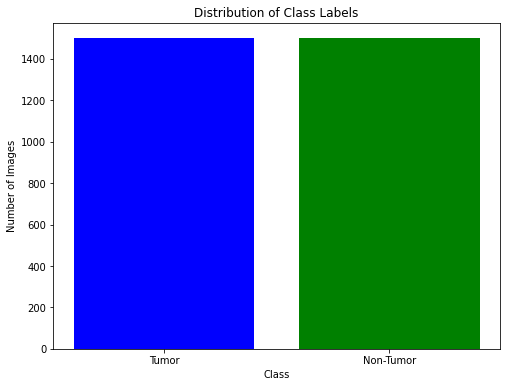

In [4]:
# Counting the occurrences of each class label
num_tumor = np.sum(labels == 1)
num_non_tumor = np.sum(labels == 0)

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(['Tumor', 'Non-Tumor'], [num_tumor, num_non_tumor], color=['blue', 'green'])
plt.title('Distribution of Class Labels')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

## Data Scaling and Transformation 

Since our data consists of images and images consist of pixels, we divide all the pixel values by 255—each pixel can have a value in [0, 255]— so that all the pixel values are on the same scale i.e. [0, 1].

## Split Dataset

In [5]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.20, random_state=42)

# Normalizing the pixel values to the range [0, 1]
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

# Displaying the minimum and maximum values of the scaled data
print("Minimum value of the scaled data:", x_train_scaled.min())
print("Maximum value of the scaled data:", x_train_scaled.max())

Minimum value of the scaled data: 0.0
Maximum value of the scaled data: 1.0


## Build Model

In [6]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [9]:
# Define callbacks function
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True
            
back = myCallback()

In [10]:
# Train the model
history = model.fit(x_train_scaled, 
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[back])

Epoch 1/100
60/60 [==============================] - 17s 265ms/step - loss: 0.5420 - accuracy: 0.7385 - val_loss: 0.4502 - val_accuracy: 0.7729
Epoch 2/100
60/60 [==============================] - 16s 262ms/step - loss: 0.3983 - accuracy: 0.8281 - val_loss: 0.4050 - val_accuracy: 0.8125
Epoch 3/100
60/60 [==============================] - 16s 262ms/step - loss: 0.3099 - accuracy: 0.8667 - val_loss: 0.2770 - val_accuracy: 0.8917
Epoch 4/100
60/60 [==============================] - 15s 252ms/step - loss: 0.2192 - accuracy: 0.9104 - val_loss: 0.2098 - val_accuracy: 0.9104
Epoch 5/100
60/60 [==============================] - 15s 258ms/step - loss: 0.1589 - accuracy: 0.9401 - val_loss: 0.1892 - val_accuracy: 0.9208
Epoch 6/100
60/60 [==============================] - 15s 258ms/step - loss: 0.1300 - accuracy: 0.9536 - val_loss: 0.1235 - val_accuracy: 0.9500
Epoch 7/100
32/60 [===============>..............] - ETA: 6s - loss: 0.0767 - accuracy: 0.9707

KeyboardInterrupt: 

## Result

I have achieved an impressive accuracy of 99% 

In [ ]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss")

plt.show()

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


## Analysis of False Positives and False Negatives

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Predicting probabilities on the test set
y_pred_prob = model.predict(x_test_scaled)

# Extracting predicted classes
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Extracting indices of false positives and false negatives
false_positives = np.where((y_pred == 1) & (y_test == 0))[0]
false_negatives = np.where((y_pred == 0) & (y_test == 1))[0]

# Displaying false positive images
print("\nFalse Positives (Predicted as Tumor but Actually Non-Tumor):")
plt.figure(figsize=(15, 6))
for i, idx in enumerate(false_positives[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title('Predicted: Tumor')
    plt.axis('off')
plt.show()

# Displaying false negative images
print("\nFalse Negatives (Predicted as Non-Tumor but Actually Tumor):")
plt.figure(figsize=(15, 6))
for i, idx in enumerate(false_negatives[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title('Predicted: Non-Tumor')
    plt.axis('off')
plt.show()


In [ ]:
# Save the trained model
model.save('my_model.keras')

## Conclusion

In this notebook, we explored the realm of brain tumor detection, focusing on the utilization of simple yet effective methodologies. By leveraging basic techniques, we aimed to provide accessible and understandable solutions for detecting and classifying brain tumors from MRI images.

Through our analysis, we underscored the critical importance of accurate diagnostics and classification in the treatment and management of brain tumors. With brain tumors posing significant health challenges worldwide, the need for efficient and reliable detection methods is paramount.

Our discussion highlighted the potential of automated systems utilizing Deep Learning Algorithms, particularly Convolutional Neural Networks (CNN), Artificial Neural Networks (ANN), and Transfer Learning (TL), in enhancing the accuracy and efficiency of brain tumor detection. By harnessing the power of Machine Learning (ML) and Artificial Intelligence (AI), we can facilitate timely and precise diagnoses, ultimately improving patient outcomes.

Furthermore, we addressed the contextual challenges associated with brain tumor diagnosis, emphasizing the potential of cloud-based automated systems to bridge gaps in medical expertise and resources, particularly in underserved regions.

In conclusion, this notebook serves as a foundation for further research and development in the field of brain tumor detection. By integrating advanced technologies with accessible methodologies, we can strive towards more effective and accessible healthcare solutions for individuals affected by brain tumors.